In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = df = pd.read_csv('housing data.csv', sep = ',', header = None)

df.head()

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

In [3]:
df.columns=['CRIM','ZN','INDUS', 'CHAS','NOX','RM', 'AGE','DIS','RAD', 'TAX','PTRATIO','B', 'LSTAT', 'MEDV']

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

**Descripción de las columnas del dataset** [Fuente](https://medium.com/datos-y-ciencia/proyecto-machine-learning-predicci%C3%B3n-de-precios-de-viviendas-en-boston-con-regresi%C3%B3n-e8655e6c3655)

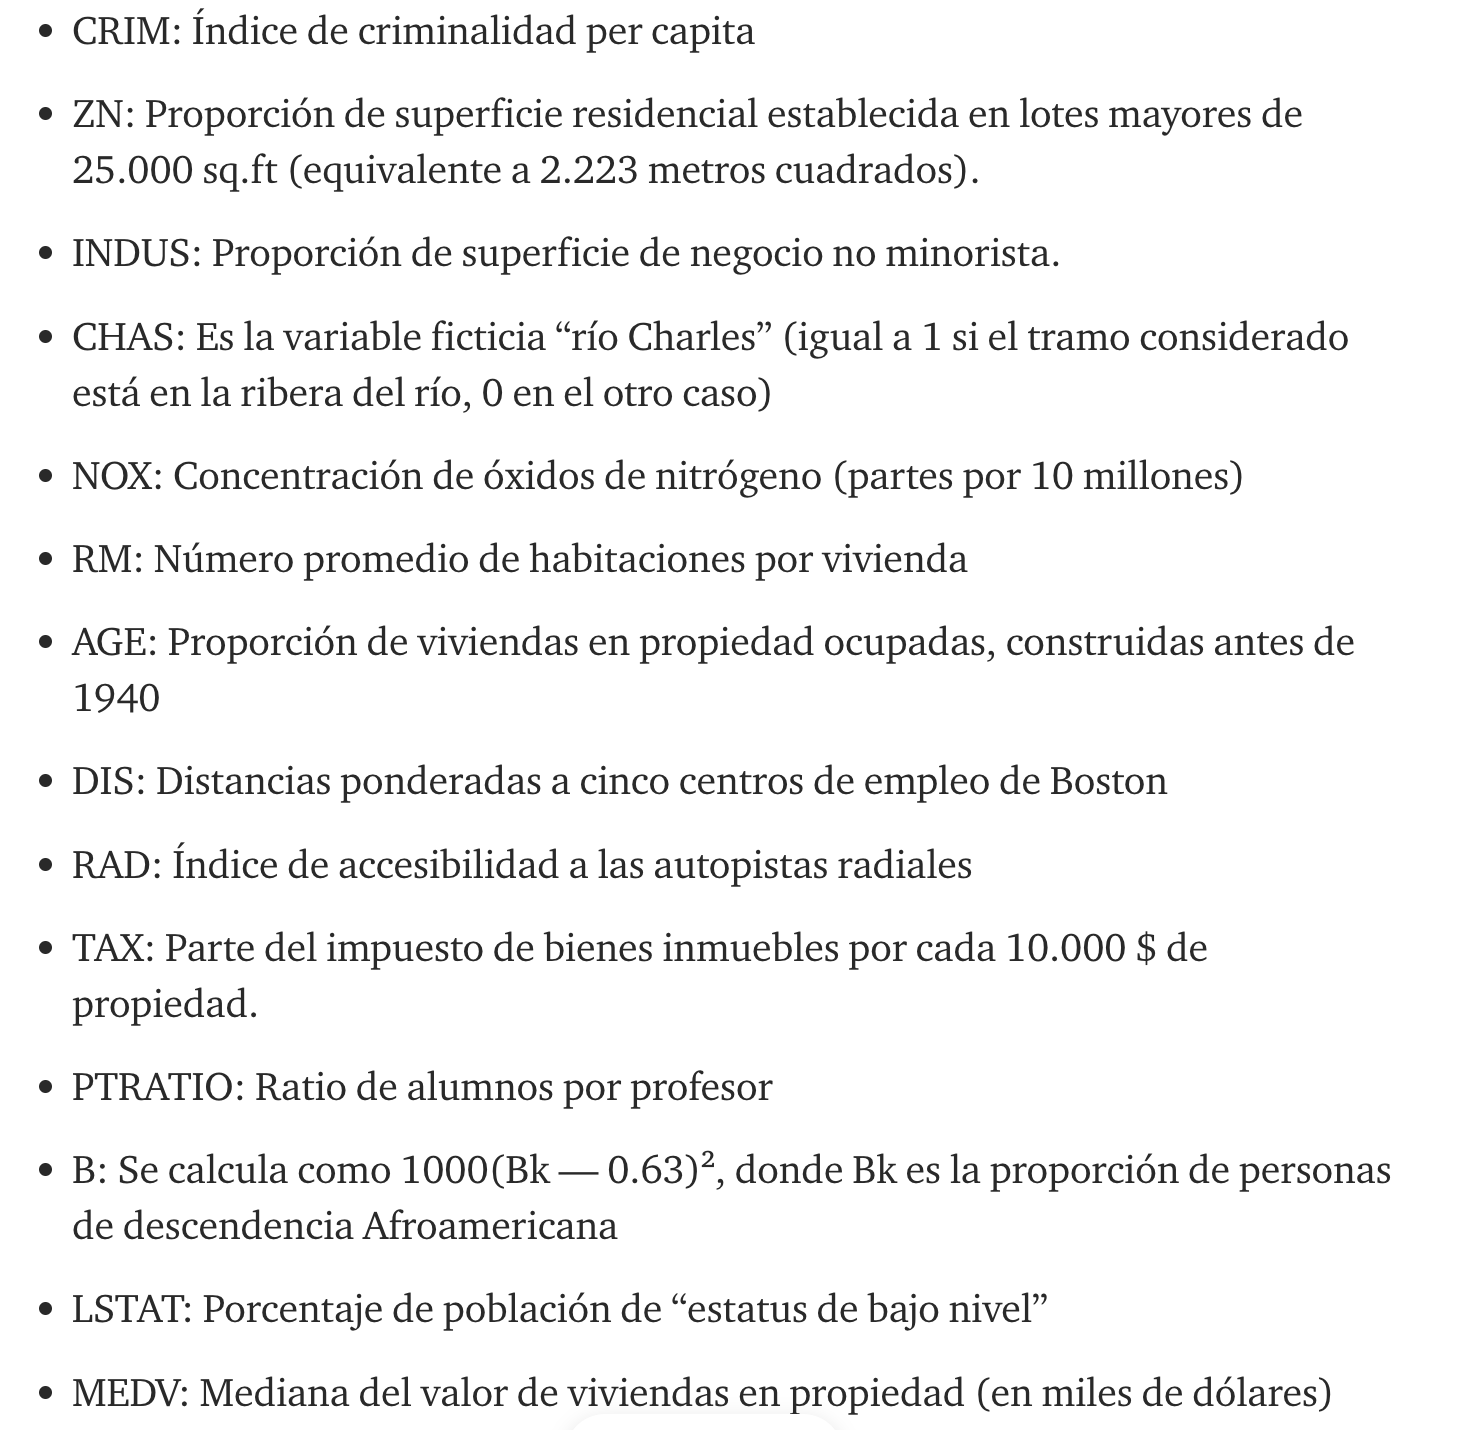

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [8]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X = df.loc[:, features]
y = df.loc[:, ['MEDV']]

#print(X, '/n', y)
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [9]:
y.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [10]:
print(X.shape, y.shape)

(506, 13) (506, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


**Comparo train y test de las X (características o features)**

Realizo una descripción númerica, un pairplot para ver distribución de datos, un boxplot y un gráfico de matriz de correlación.

In [12]:
X_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.386324   11.794554   11.123441    0.069307    0.555886    6.301797   
std      8.137943   23.636906    6.993011    0.254290    0.115201    0.694692   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.078935    0.000000    5.130000    0.000000    0.449000    5.887750   
50%      0.256510    0.000000    9.125000    0.000000    0.538000    6.211000   
75%      3.359357   20.000000   18.100000    0.000000    0.631000    6.675000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.027228    3.770242    9.403465  402.844059   18.462376  358.785446   
std     28.106955    2.080583    8.661147  170.857022    2.194821   88.663438   
min      2.900000    1.174200    1.000000  187.000000   12.600000    0.320000   
25%     45.675000    2.087875    4.000000  276.000000   17.400000  376.132500   
50%     77.950000    3.190950    5.000000  322.000000   19.100000  391.600000   
75%     93.900000    5.141475   24.000000  666.000000   20.200000  396.060000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.706188  
std      7.299031  
min      1.730000  
25%      6.727500  
50%     11.300000  
75%     17.112500  
max     36.980000

In [13]:
X_test.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     4.513411    9.656863   11.189608    0.068627    0.549979    6.216657   
std     10.230340   22.061680    6.339877    0.254068    0.118982    0.732735   
min      0.013600    0.000000    0.740000    0.000000    0.392000    3.863000   
25%      0.094115    0.000000    5.885000    0.000000    0.448000    5.881000   
50%      0.249035    0.000000    9.900000    0.000000    0.520000    6.157000   
75%      5.178705    0.000000   18.100000    0.000000    0.605000    6.469000   
max     73.534100   85.000000   21.890000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.783333    3.893275   10.127451  429.598039   18.428431  348.311176   
std     28.382215    2.210300    8.907302  158.010105    2.052498  101.085667   
min      8.400000    1.129600    1.000000  224.000000   12.600000    2.600000   
25%     39.625000    2.135475    4.000000  304.000000   16.900000  366.755000   
50%     72.550000    3.347500    5.000000  384.000000   18.700000  390.680000   
75%     95.200000    5.186050   24.000000  666.000000   20.200000  396.900000   
max    100.000000   10.710300   24.000000  666.000000   21.200000  396.900000   

            LSTAT  
count  102.000000  
mean    12.442647  
std      6.507064  
min      1.920000  
25%      8.027500  
50%     11.550000  
75%     15.705000  
max     37.970000

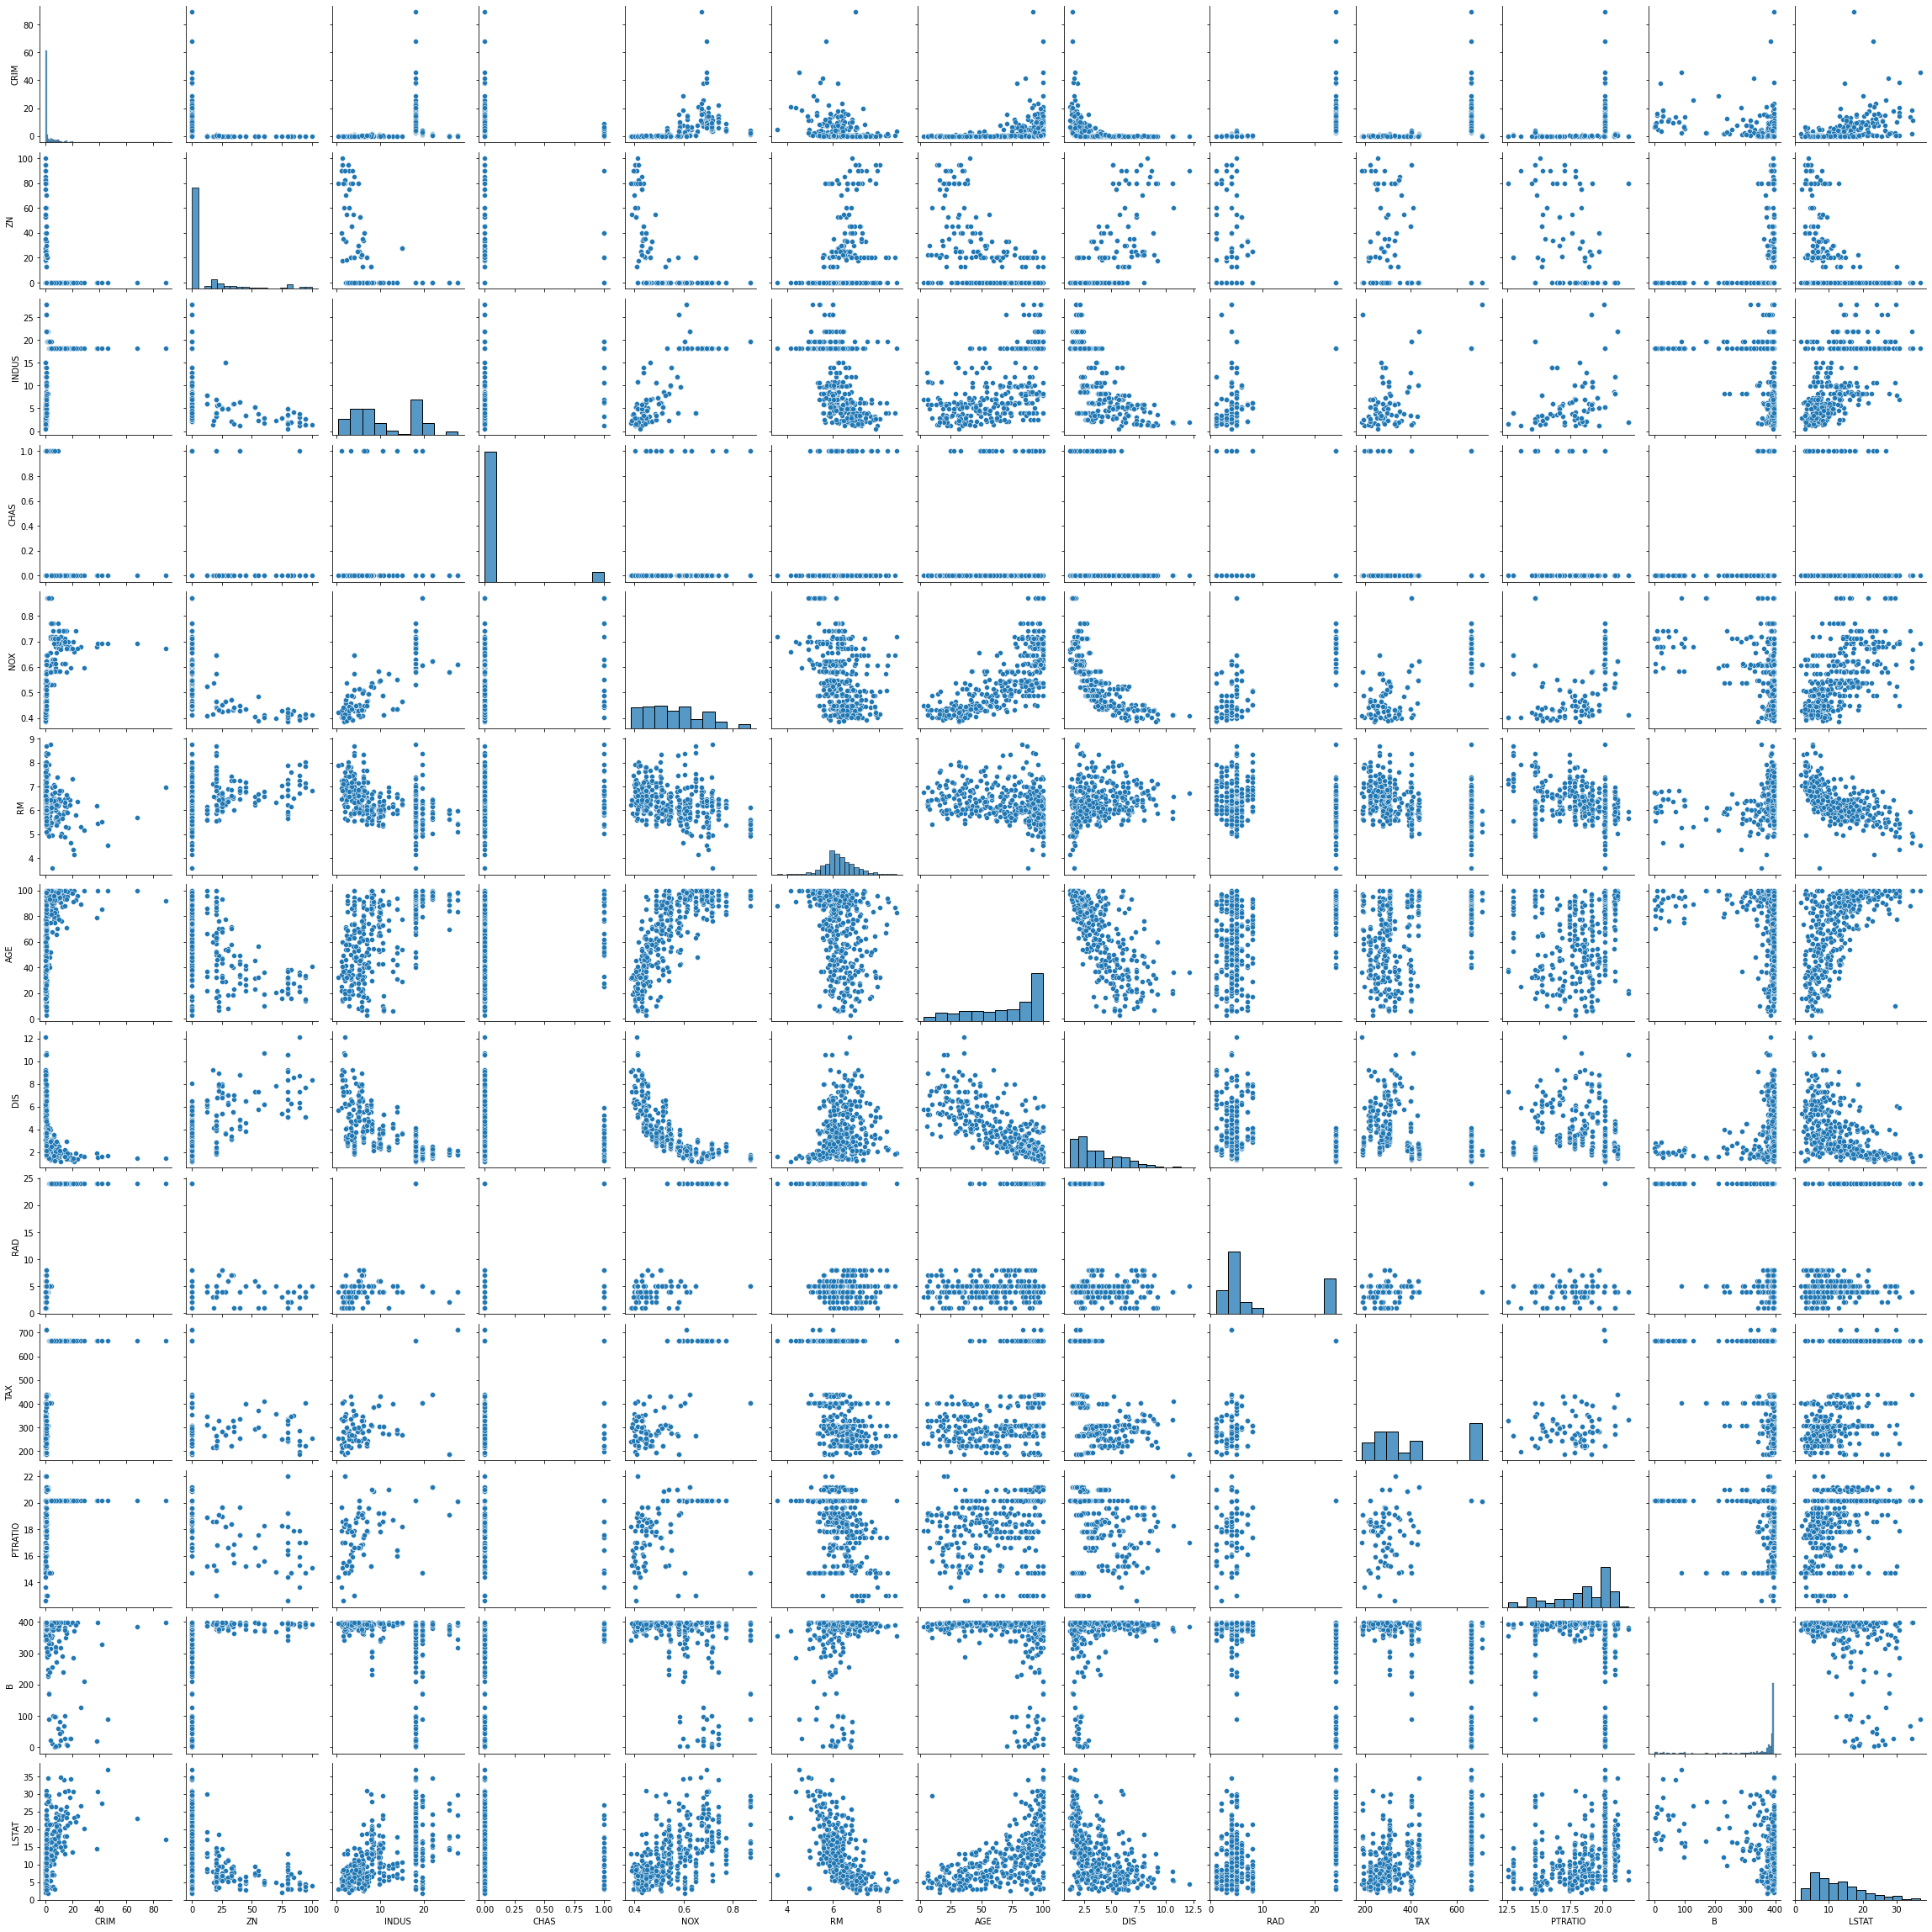

In [14]:
sns.pairplot(X_train)
plt.show()

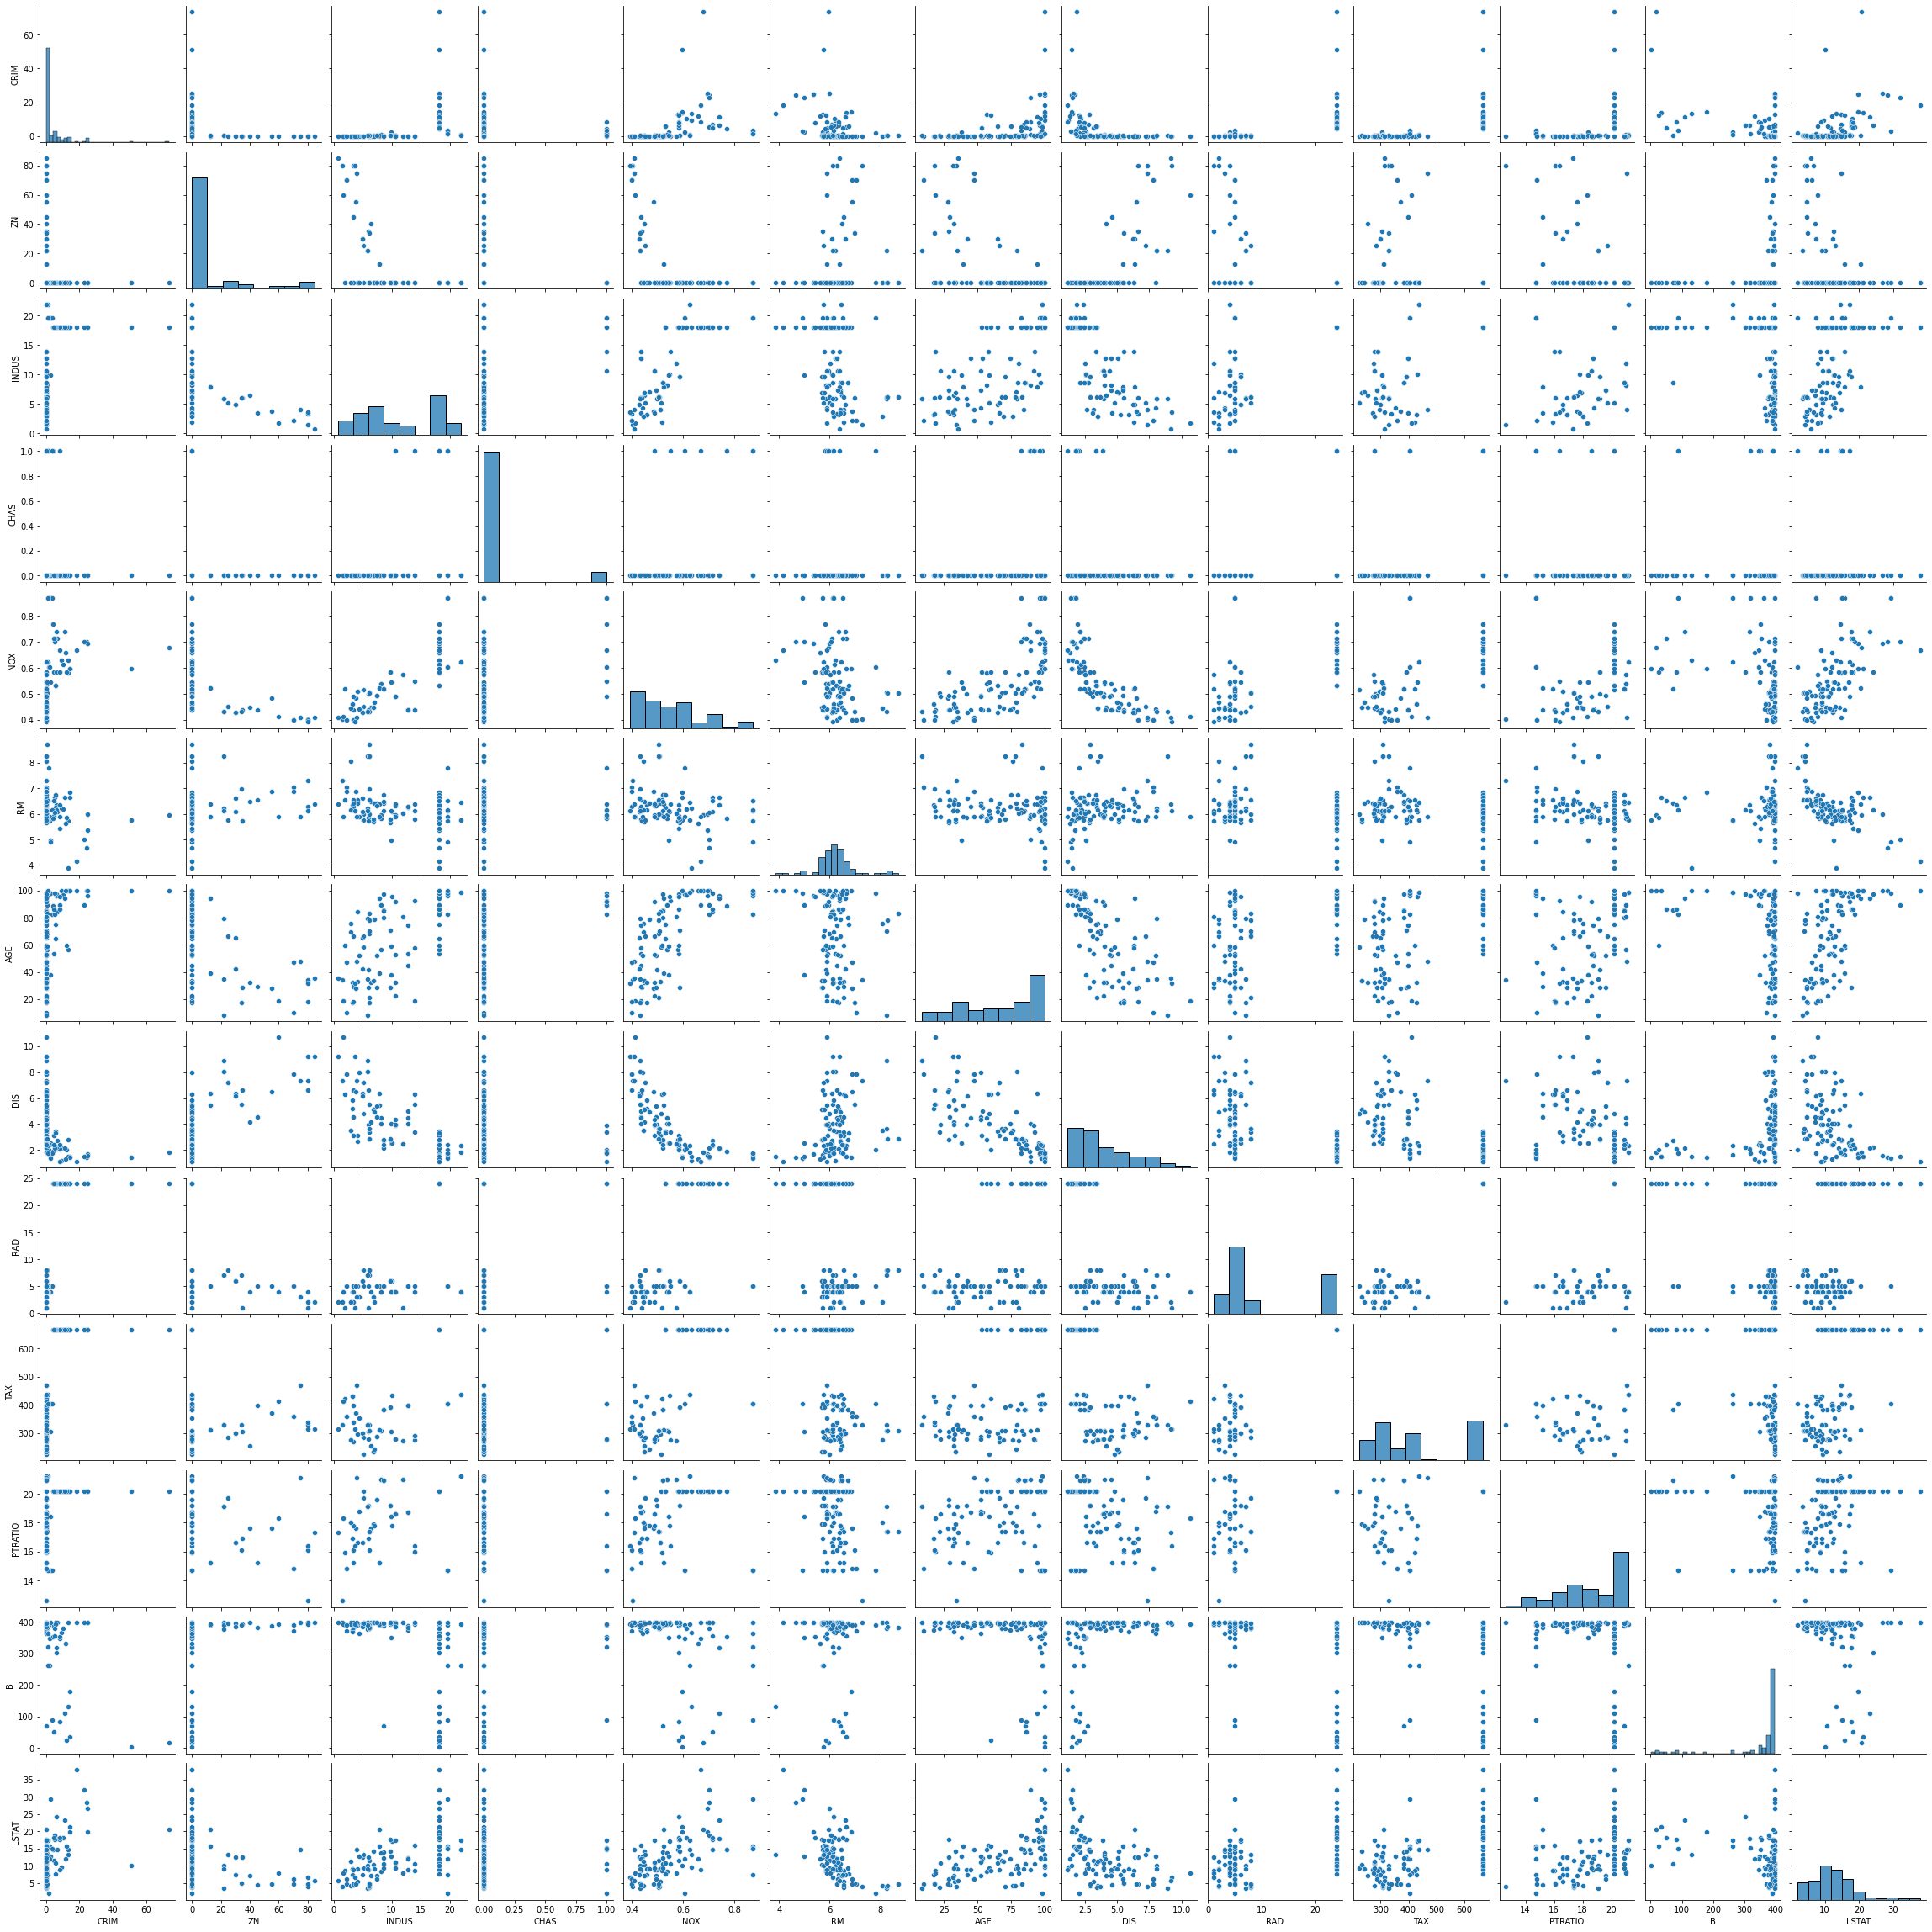

In [15]:
sns.pairplot(X_test)
plt.show()

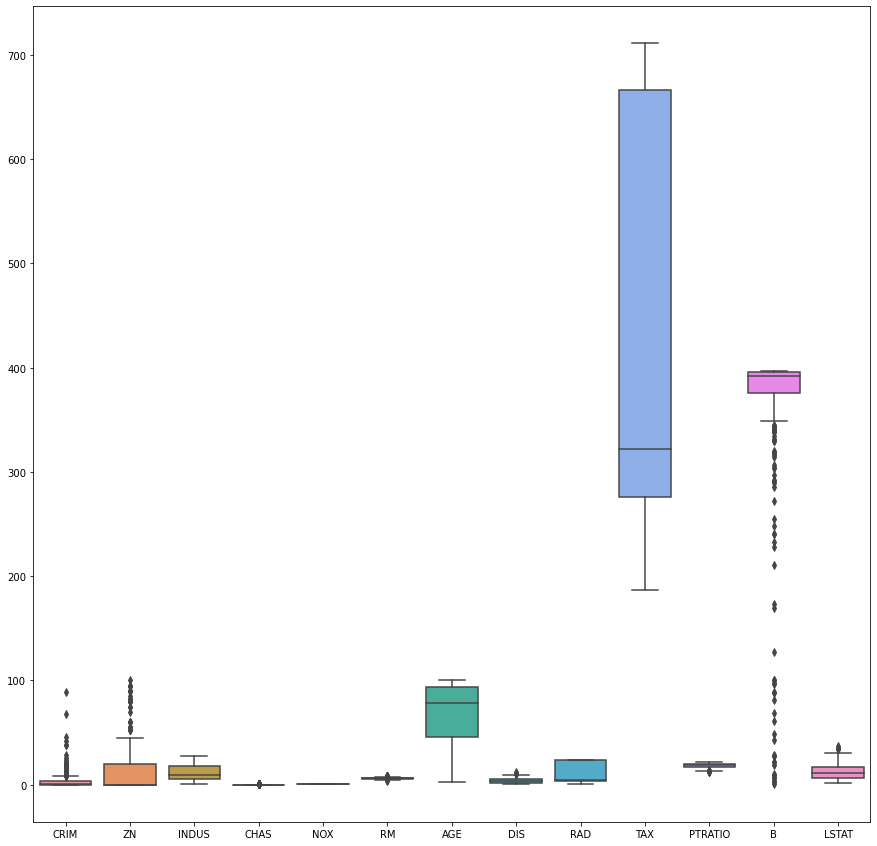

In [16]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=X_train)
plt.show()

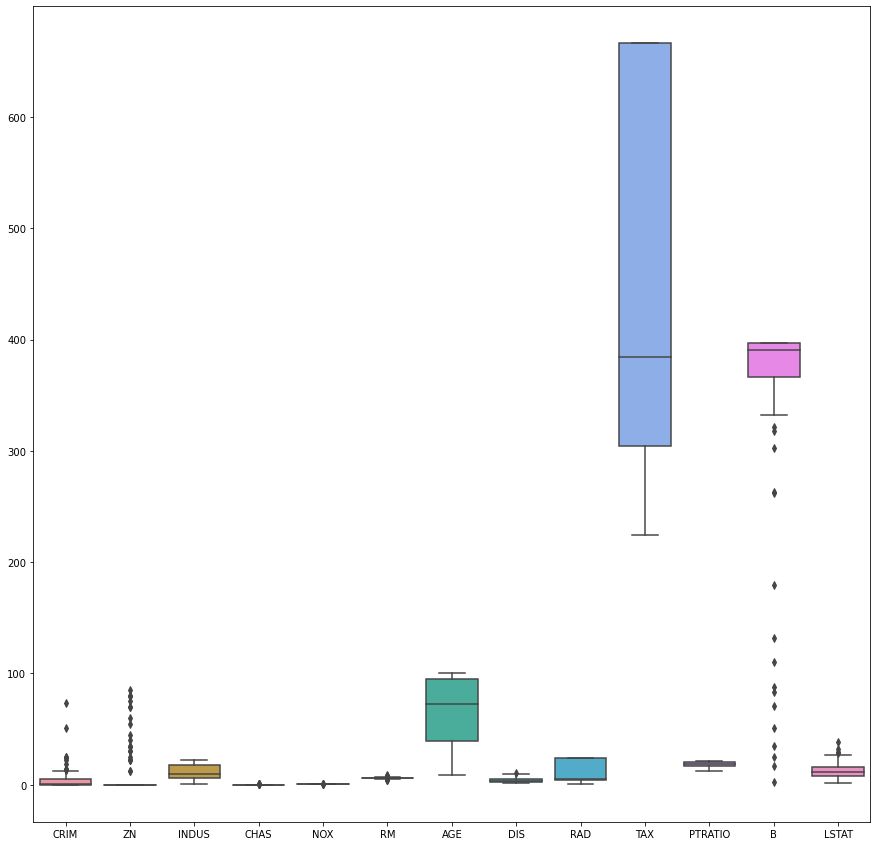

In [17]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=X_test)
plt.show()

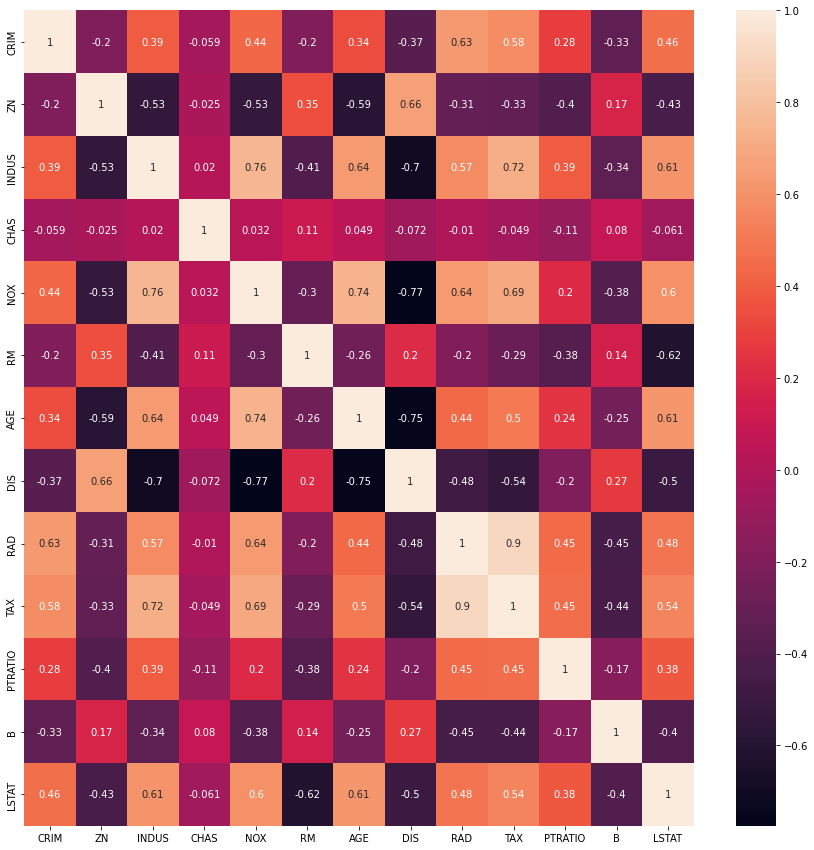

In [18]:
plt.figure(figsize=(15, 15))
corrMatrix = X_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

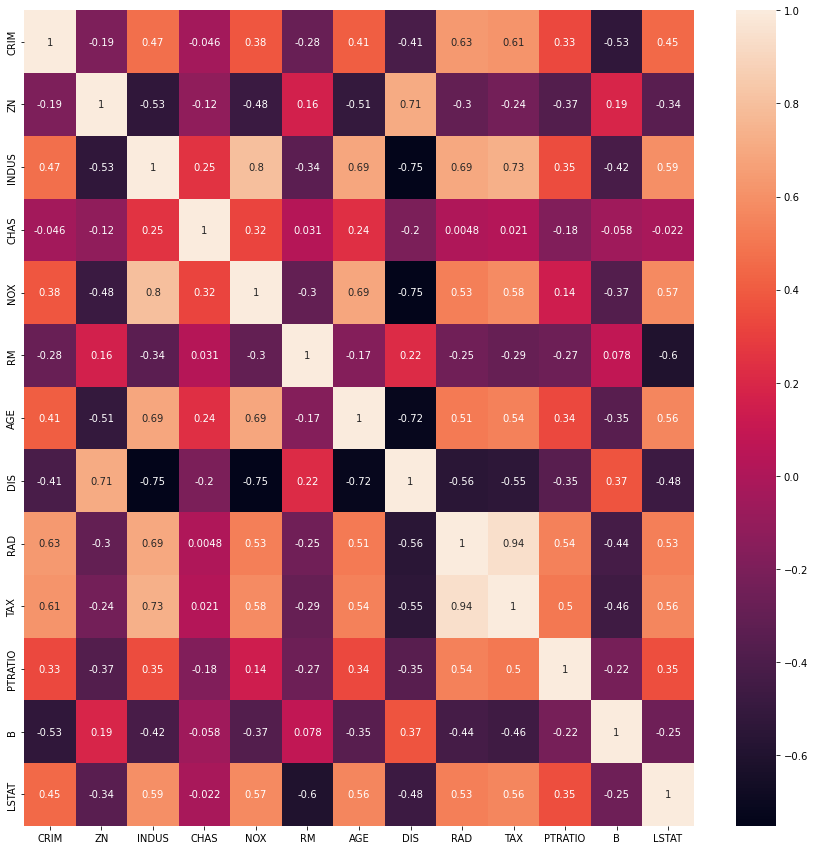

In [19]:
plt.figure(figsize=(15, 15))
corrMatrix = X_test.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Conclusión: aunque en la parte numérica parecían ser un poco diferentes, los gráficos muestran que las muestras de train y test de la caracteríticas son similares

**Comparo train y test de las y (objetivo o target)**

Realizo descripción numérica, gráfico de distribución de los datos, relación con una de las variables de las caraterísticas (X)

In [20]:
y_train.describe()

MEDV
count  404.000000
mean    22.611881
std      9.238777
min      5.000000
25%     16.775000
50%     21.400000
75%     25.525000
max     50.000000

In [21]:
y_test.describe()

MEDV
count  102.000000
mean    22.219608
std      9.068333
min      5.600000
25%     17.100000
50%     20.550000
75%     23.875000
max     50.000000

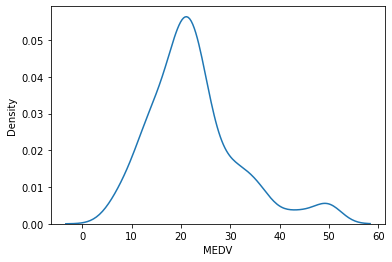

In [22]:
sns.kdeplot(y_train['MEDV'])
plt.show()

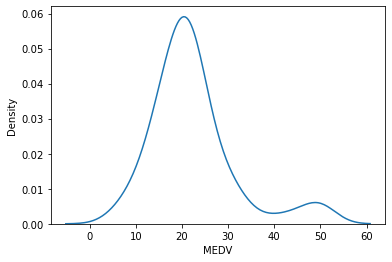

In [23]:
sns.kdeplot(y_test['MEDV'])
plt.show()

Tomo la variable RM de las características, pues considero que tiene una buena correlación con el MEDV del objetivo y grafico para ver si hay similitud entre el test y el train.

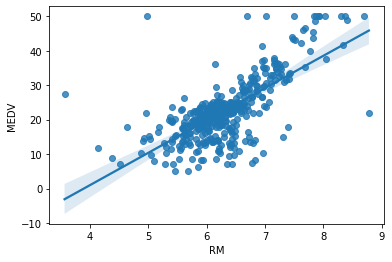

In [24]:
sns.regplot(x=X_train["RM"], y=y_train["MEDV"])
plt.show()

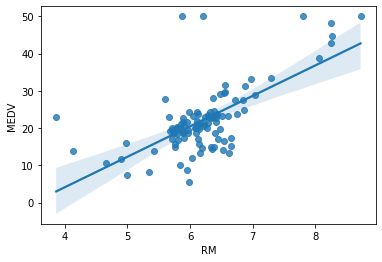

In [25]:
sns.regplot(x=X_test["RM"], y=y_test["MEDV"])
plt.show()

Conclusiones: hay similitud entre la muestra train y test de los objetivos

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [26]:
#la libreria para prepocesar datos de sklearn
from sklearn import preprocessing 

Observación general de las variables

<Figure size 432x288 with 0 Axes>

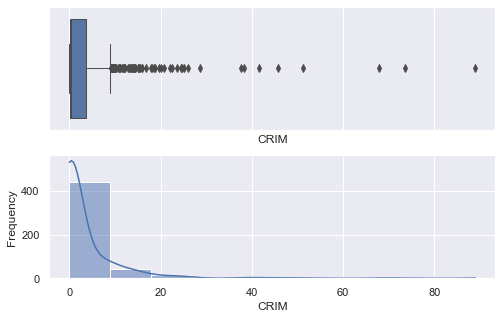

<Figure size 576x360 with 0 Axes>

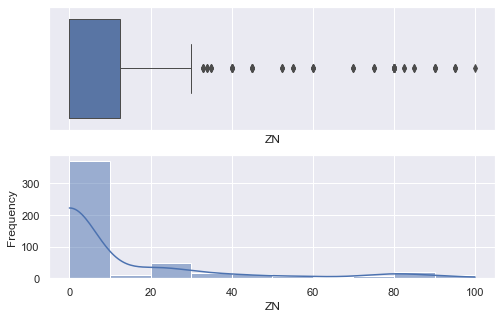

<Figure size 576x360 with 0 Axes>

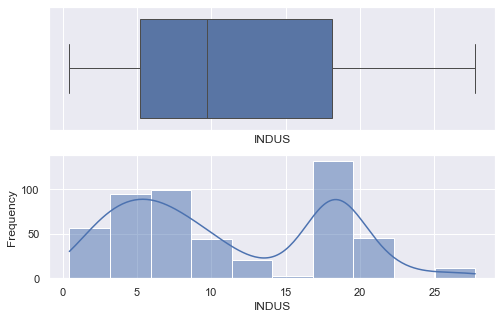

<Figure size 576x360 with 0 Axes>

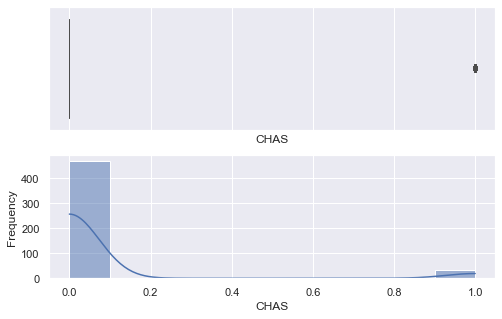

<Figure size 576x360 with 0 Axes>

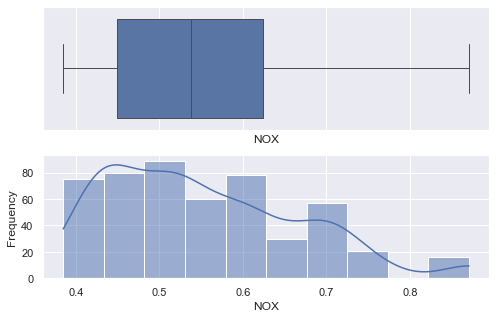

<Figure size 576x360 with 0 Axes>

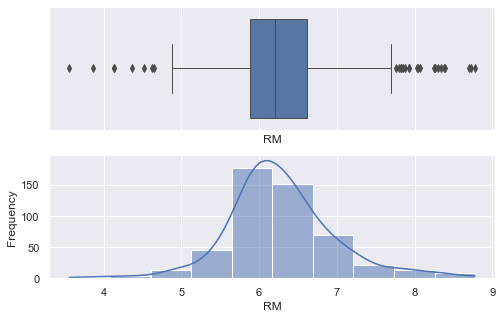

<Figure size 576x360 with 0 Axes>

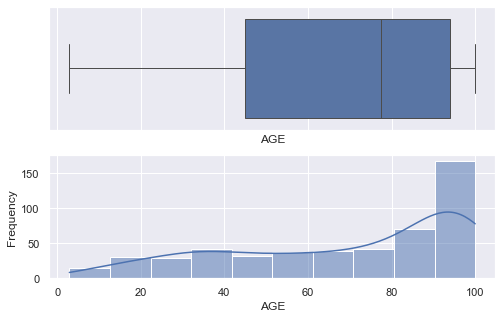

<Figure size 576x360 with 0 Axes>

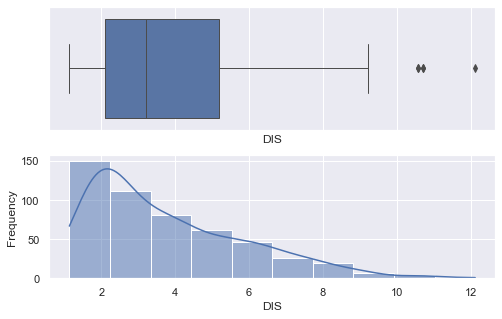

<Figure size 576x360 with 0 Axes>

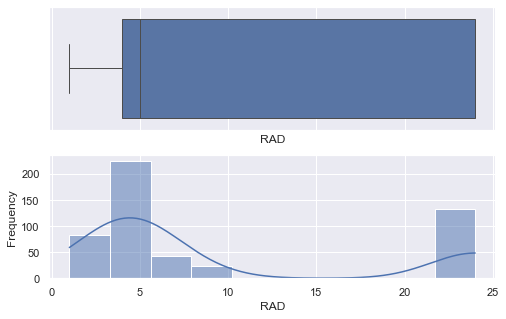

<Figure size 576x360 with 0 Axes>

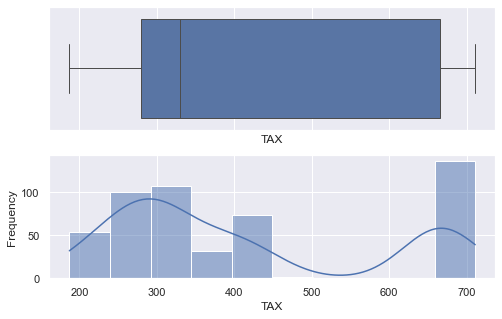

<Figure size 576x360 with 0 Axes>

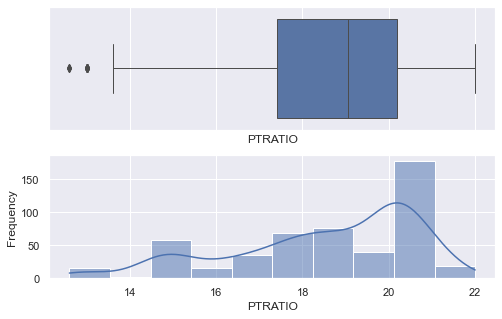

<Figure size 576x360 with 0 Axes>

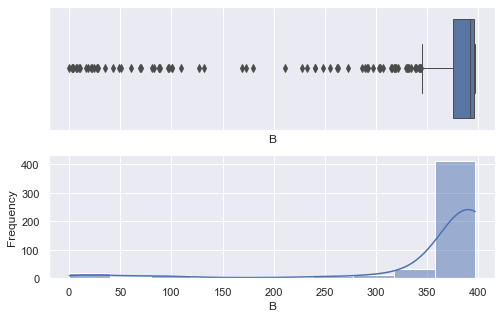

<Figure size 576x360 with 0 Axes>

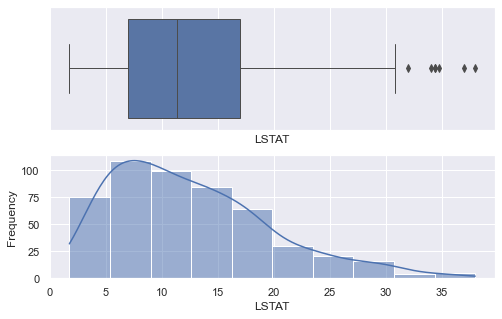

<Figure size 576x360 with 0 Axes>

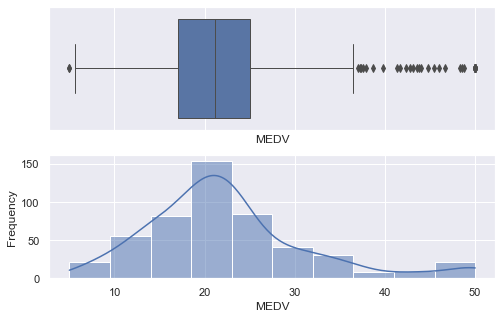

In [27]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)


A la variable 'Chas' no se le hara ninguna transformación por ser ya un dummie y está listo para un entrenamiento de Machine learning.

Observo que las columnas CRIM, ZN, RM, DIS, PTRATIO, B y LSTAT tienen outliers y haré con ellas un Robustcaler

Haré un Dataframe diferente con las modificaciones para poder compararlas con las originales de ser necesario

In [28]:
#Creo un df con las columnas a escalar (con Robust)
dfTran = df.copy()

In [29]:
dfTran.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Se considera a RAD una variable ordinal con ordenación clasificada entre valores. 
Al ser un índice de accesibilidad existe una relación entre cada número
Como ya es de tipo numérica no se la hará ningun tratamiento.
[Fuente](https://stackoverflow.com/questions/62440038/would-an-index-of-accessibility-to-radial-highways-be-considered-discrete-nume)

In [30]:
#RobustScaler para las columnas con outliers
columnsR = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(dfTran[columnsR])
dfTran[columnsR] = scaler.transform(dfTran[columnsR])


dfTran.head()


CRIM    ZN  INDUS  CHAS    NOX        RM   AGE       DIS  RAD    TAX  \
0 -0.069593  1.44   2.31     0  0.538  0.496612  65.2  0.285777    1  296.0   
1 -0.063755  0.00   7.07     0  0.469  0.287940  78.9  0.569789    2  242.0   
2 -0.063760  0.00   7.07     0  0.469  1.323171  61.1  0.569789    2  242.0   
3 -0.062347  0.00   2.18     0  0.458  1.069783  45.8  0.924391    3  222.0   
4 -0.052144  0.00   2.18     0  0.458  1.271680  54.2  0.924391    3  222.0   

    PTRATIO         B     LSTAT  MEDV  
0 -1.339286  0.261902 -0.637681  24.0  
1 -0.446429  0.261902 -0.221889  21.6  
2 -0.446429  0.066675 -0.732634  34.7  
3 -0.125000  0.153016 -0.841579  33.4  
4 -0.125000  0.261902 -0.602699  36.2

Buscaré entre las variables restantes (INDUS, NOX, AGE, TAX) si son gaussianas o no para ver si estandarizo o normalizo

In [31]:
from scipy import stats


for i in dfTran[['INDUS', 'NOX', 'AGE', 'TAX']]:
    shapiro_test = stats.shapiro(dfTran[i])
    print('Para la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablemente Gaussiana\n')
    else:
        print("Probablemente no Gaussiana\n")

Para la variable  INDUS con un p-value de  1.0641241829131273e-17
Probablemente no Gaussiana

Para la variable  NOX con un p-value de  5.775580887027246e-14
Probablemente no Gaussiana

Para la variable  AGE con un p-value de  2.2305888882906016e-18
Probablemente no Gaussiana

Para la variable  TAX con un p-value de  1.1629455306806005e-23
Probablemente no Gaussiana



Ninguna columna tiene distribución normal. Haré una normalización de todas.

In [32]:
#columnsS =['NOX']
#scalerStand = preprocessing.StandardScaler().fit(dfTran[columnsS])
#dfTran[columnsS] = scalerStand.transform(dfTran[columnsS])



columnsN = ['INDUS', 'NOX', 'AGE', 'TAX']
scalerNorm = preprocessing.MinMaxScaler().fit(dfTran[columnsN])
dfTran[columnsN] = scalerNorm.transform(dfTran[columnsN])



dfTran.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

   RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0    1  0.208015 -1.339286  0.261902 -0.637681  24.0  
1    2  0.104962 -0.446429  0.261902 -0.221889  21.6  
2    2  0.104962 -0.446429  0.066675 -0.732634  34.7  
3    3  0.066794 -0.125000  0.153016 -0.841579  33.4  
4    3  0.066794 -0.125000  0.261902 -0.602699  36.2

## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [33]:
dfTran.describe()

CRIM          ZN       INDUS        CHAS         NOX  \
count  5.060000e+02  506.000000  506.000000  506.000000  506.000000   
mean   9.337910e-01    0.909091    0.391378    0.069170    0.349167   
std    2.392616e+00    1.865796    0.251479    0.253994    0.238431   
min   -6.959315e-02    0.000000    0.000000    0.000000    0.000000   
25%   -4.852940e-02    0.000000    0.173387    0.000000    0.131687   
50%   -7.697835e-18    0.000000    0.338343    0.000000    0.314815   
75%    9.514706e-01    1.000000    0.646628    0.000000    0.491770   
max    2.467838e+01    8.000000    1.000000    1.000000    1.000000   

               RM         AGE           DIS         RAD         TAX  \
count  506.000000  506.000000  5.060000e+02  506.000000  506.000000   
mean     0.103163    0.676364  1.902672e-01    9.549407    0.422208   
std      0.952056    0.289896  6.818457e-01    8.707259    0.321636   
min     -3.587398    0.000000 -6.728244e-01    1.000000    0.000000   
25%     -0.437669    0.433831 -3.585445e-01    4.000000    0.175573   
50%      0.000000    0.768280  7.199102e-17    5.000000    0.272901   
75%      0.562331    0.938980  6.414555e-01   24.000000    0.914122   
max      3.484417    1.000000  2.888060e+00   24.000000    1.000000   

          PTRATIO           B         LSTAT        MEDV  
count  506.000000  506.000000  5.060000e+02  506.000000  
mean    -0.212309   -1.667632  1.292417e-01   22.532806  
std      0.773195    4.379176  7.137493e-01    9.197104  
min     -2.303571  -18.761003 -9.625187e-01    5.000000  
25%     -0.589286   -0.770476 -4.407796e-01   17.025000  
50%      0.000000    0.000000  8.847090e-17   21.200000  
75%      0.410714    0.229524  5.592204e-01   25.000000  
max      1.053571    0.261902  2.659670e+00   50.000000

<Figure size 576x360 with 0 Axes>

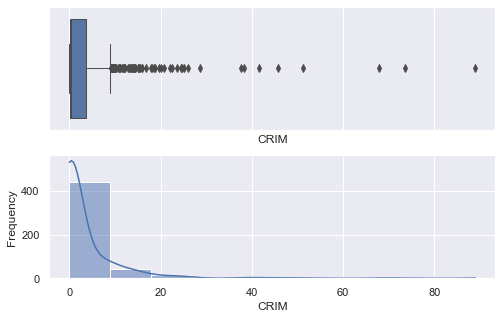

<Figure size 576x360 with 0 Axes>

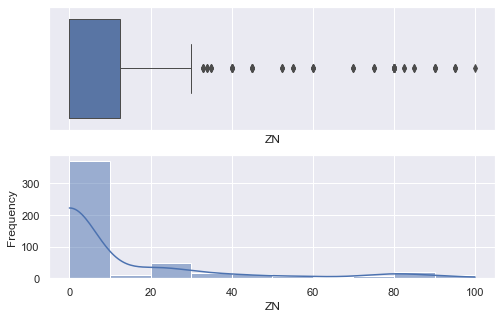

<Figure size 576x360 with 0 Axes>

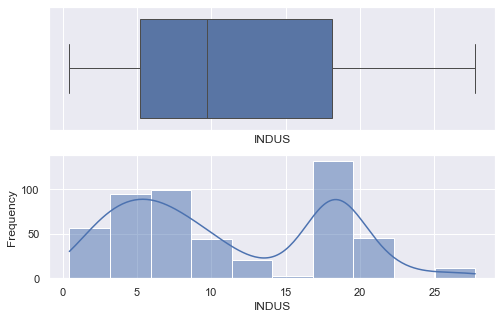

<Figure size 576x360 with 0 Axes>

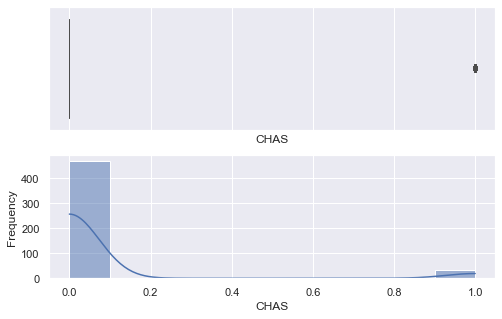

<Figure size 576x360 with 0 Axes>

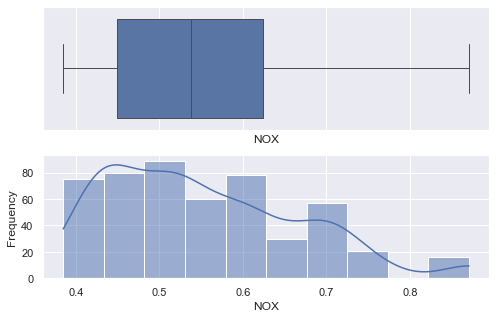

<Figure size 576x360 with 0 Axes>

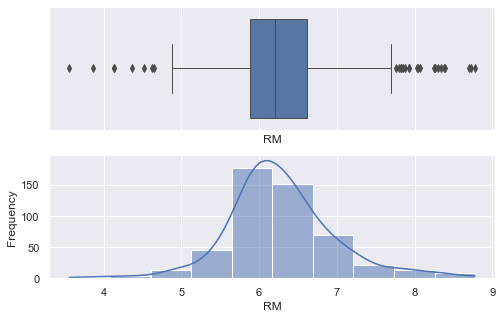

<Figure size 576x360 with 0 Axes>

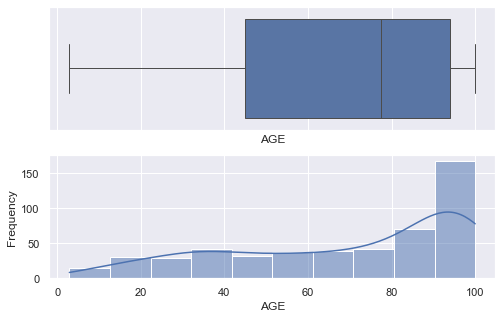

<Figure size 576x360 with 0 Axes>

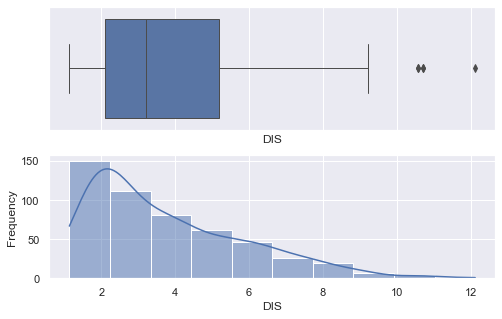

<Figure size 576x360 with 0 Axes>

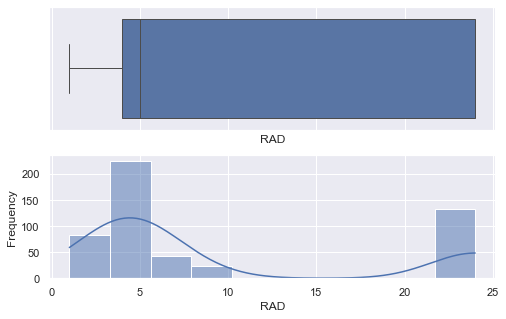

<Figure size 576x360 with 0 Axes>

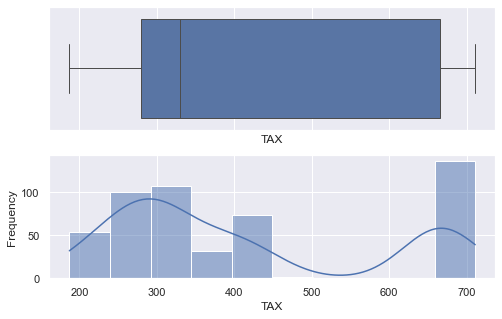

<Figure size 576x360 with 0 Axes>

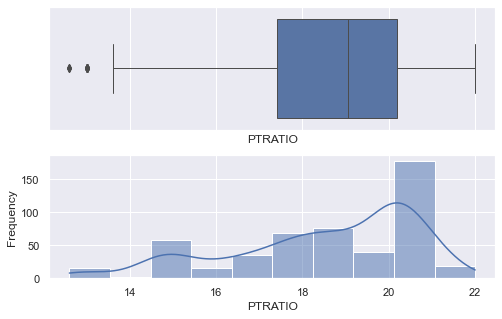

<Figure size 576x360 with 0 Axes>

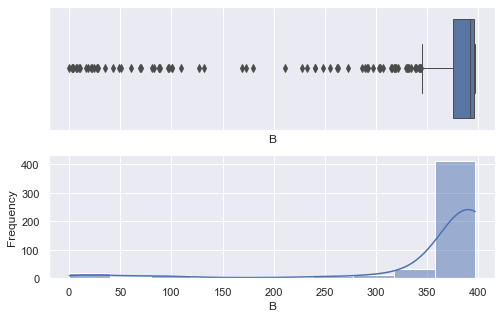

<Figure size 576x360 with 0 Axes>

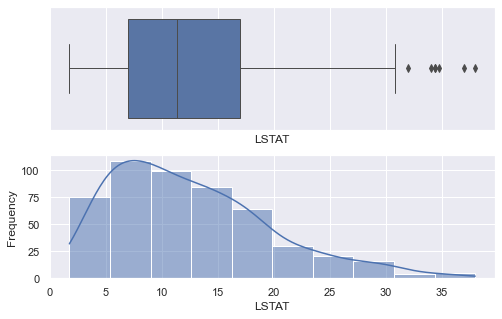

<Figure size 576x360 with 0 Axes>

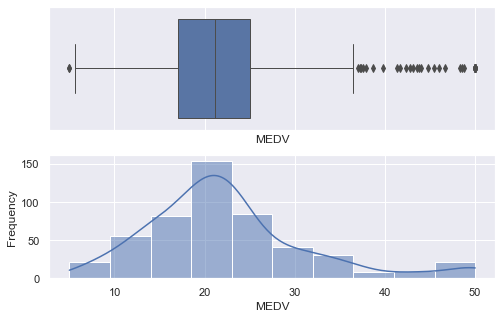

In [34]:
for i in dfTran.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

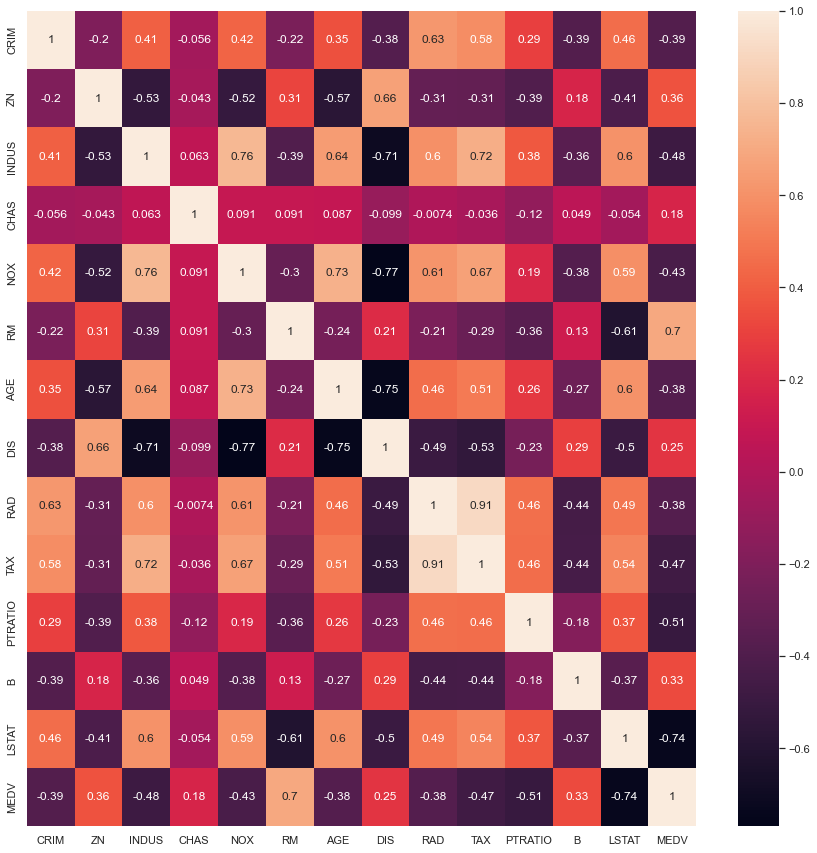

In [35]:
plt.figure(figsize=(15, 15))
corrMatrix = dfTran.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

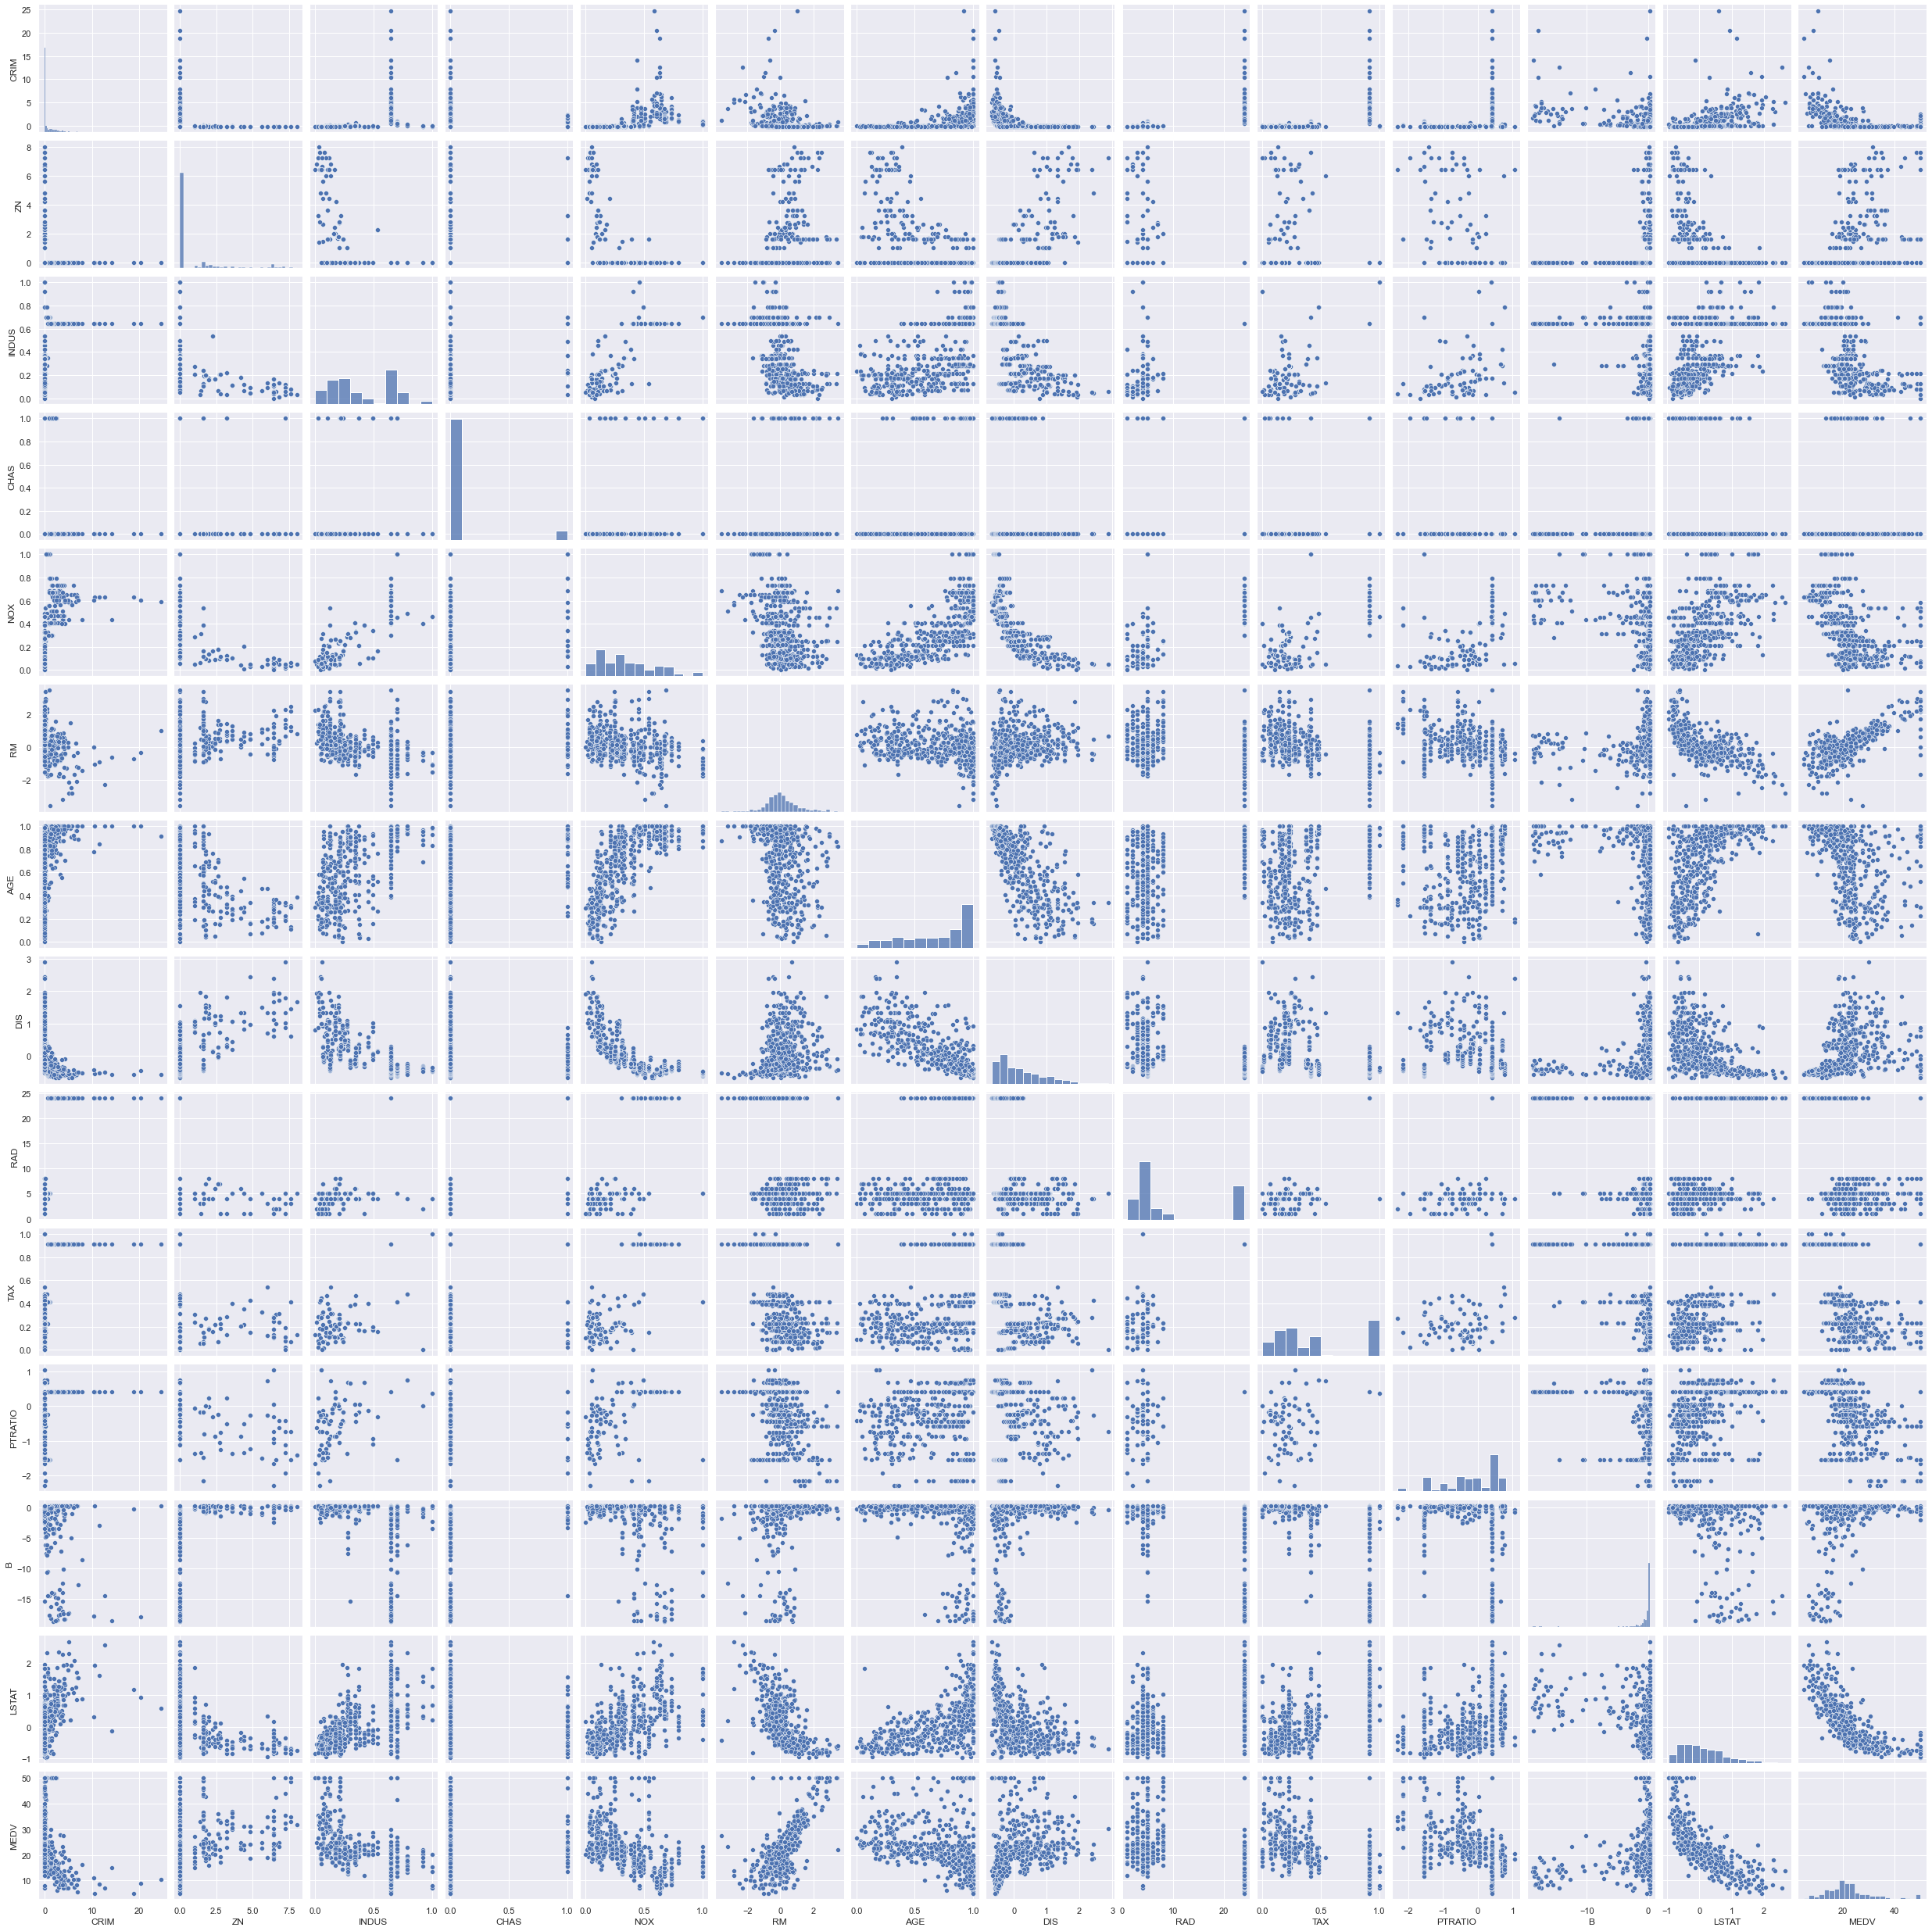

In [36]:
sns.pairplot(dfTran)
plt.show()